# EE257 Project Dataset Visualization

[Shoulder Implant X-Ray Manufacturer Classification Data Set (2020)](https://archive.ics.uci.edu/ml/datasets/Shoulder+Implant+X-Ray+Manufacturer+Classification)

In [1]:
import os

current_path = os.getcwd()
dataset_path = current_path + '\dataset'
dataset_path

'c:\\Users\\tickn\\ml\\EE257\\EE257 Project\\dataset'

In [2]:
# Number of observations

import pathlib

data_dir = pathlib.Path(dataset_path + '\data')
image_count = len(list(data_dir.glob('**\*.jpg')))
print("Number of images: " + str(image_count))

Number of images: 597


In [3]:
# Image size
from PIL import Image
import random

def describe_img(filepath):
    rand_img = random.choice(list(filepath.glob('**\*.jpg')))
    width, height = Image.open(str(rand_img)).size

    return width, height

img_width, img_height = describe_img(data_dir)
print('Image size is %s by %s pixels' %(img_width, img_height))


Image size is 250 by 250 pixels


In [4]:
# Number of classes and class names
import tensorflow as tf
from tensorflow import keras 

batch_size = 32

# load image dataset
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (img_height , img_width),
)

print('---------------------')

# print class names
print("Class names:")
for name in ds.class_names:
    print(name)


Found 597 files belonging to 4 classes.
---------------------
Class names:
Cofield
Depuy
Tornier
Zimmer


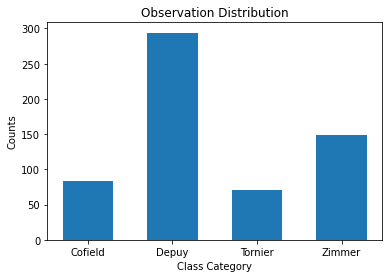

['Cofield', 'Depuy', 'Tornier', 'Zimmer']
[83, 294, 71, 149]


In [5]:
# Distribution of observations per class
import matplotlib.pylab as plt

# empty list of int 
class_counts = [0] * len(list(ds.class_names))

for img, labels in ds:
    for obs in labels:
        class_counts[obs]+=1

distribution = dict(zip(ds.class_names , class_counts))

#plot bar chart
plt.bar(list(distribution.keys()) , distribution.values() , width =0.6)
plt.title('Observation Distribution')
plt.xlabel('Class Category')
plt.ylabel('Counts')
plt.show()

print(ds.class_names)
print(class_counts)

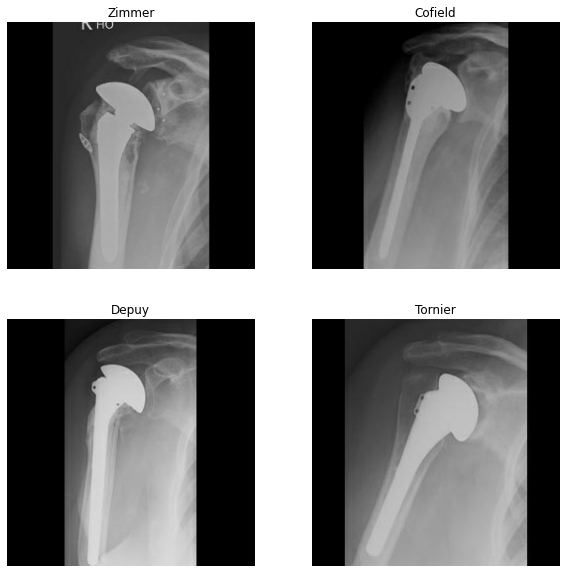

In [6]:
# Visualize a photo from each class

unique = []
i=0
plt.figure(figsize=(10, 10))
for images, labels in ds.take(1):
    for item in range(len(labels)):
        if labels[item] in unique:
            continue
        else:
            ax = plt.subplot(2, 2, i + 1)
            plt.imshow(images[item].numpy().astype("uint8"))
            plt.title(ds.class_names[labels[item]])
            plt.axis("off")

            i+=1
            unique.append(labels[item])
        
    break # run only once through a batch